# problem statement

To make a profit, insurance companies should generally collect a higher premium than the amount paid to the insured person if they raise a valid claim. This being the case, insurance companies require a method of accurately predicting health care costs.

**Therefore our goal is to accurately predict health care costs using the given set of features.**
# Overview
Insurance companies cover expenses the policyholder incurs from damages to health or
property policies commonly offered: medical bills, house, motor vehicle, and fire
insurance, and financial losses such as a loss of income against a fee or premium paid
by the client. Traditional approaches to premium calculation require a lot of
time-consuming human labor and are getting more complicated daily to capture the
increasingly complex interactions in the data.
Insurance firms should normally collect a higher premium than the amount given to the
insured individual if that person files a valid claim to generate a profit. Since profitability
is the fundamental factor that helps the insurance firm survive, they need a mechanism
for reliably forecasting healthcare expenses.
Hence, our goal is to build a machine learning model that helps establish the rates by
predicting the charges or payouts done by the health insurance firm to maintain
profitability.
In this project, we will primarily focus on building an XGBoost Regressor to determine
healthcare expenses based on features such as age, BMI, smoking, etc. We will also
learn about categorical correlation, build a linear regression model as a baseline and
compare it with the results of the XGBoost Regressor. We will eventually learn how to
communicate technical results to stakeholders who are not technical.

# Aim
This data science project aims to build and evaluate linear and xgboost regression
models and determine the healthcare charges of each customer. This analysis will help
the insurance firm to strategize a premium plan that will help maximize the profits.

# Data Description
The insurance price forecast dataset contains historical records for 1338 insured
customers. The column definitions are below
1. age: Age of the primary beneficiary.
2. sex: Gender of the primary beneficiary.
3. BMI: Body mass index of primary beneficiary
4. children: Number of children the primary beneficiary has.
5. smoker: Whether the primary beneficiary smokes.
6.  region: The primary beneficiary's residential area in the US.
7. charges: Individual medical costs billed by health insurance


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression



In [ ]:
# import data
df = pd.read_csv('/content/insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
target = 'charges'
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
X.shape, y.shape

((1338, 6), (1338,))

In [ ]:
import matplotlib.pyplot as plt

def plot_histograms(X):
    for col in X.columns:
        plt.hist(X[col], bins=20, alpha=0.5)
        plt.title(col)
        plt.show()

EDA

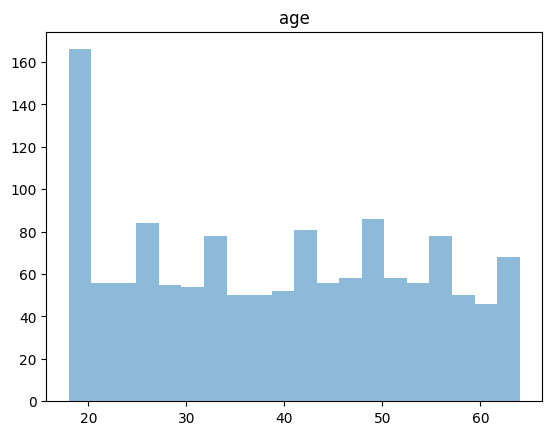

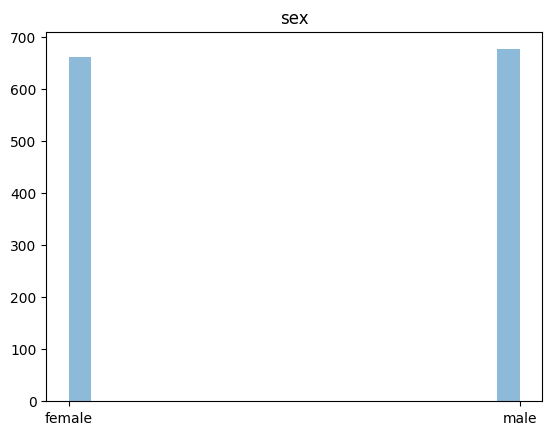

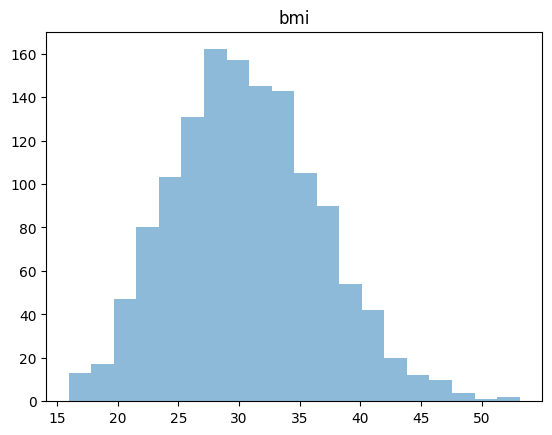

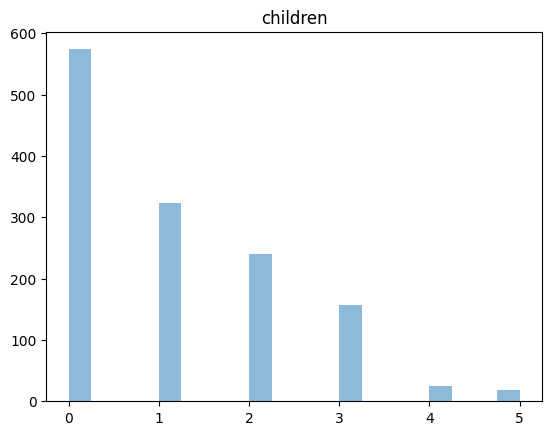

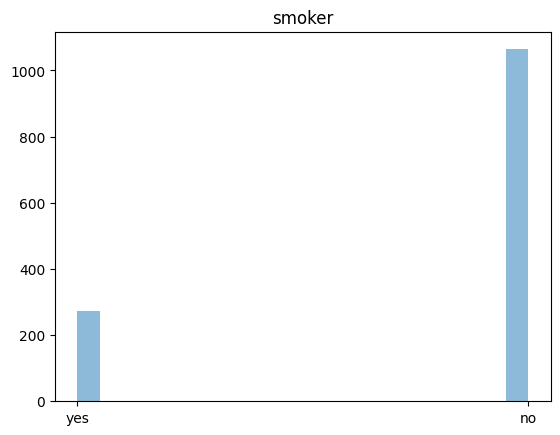

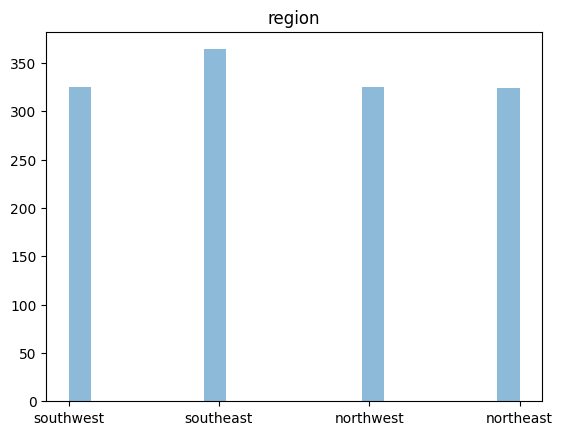

In [ ]:
# Plot distribution of data
plot_histograms(X)

Points to note regarding the distribution of each feature:

* `age` - Approximately uniformly distributed.
* `sex` - Approximately equal volume in each category.
* `bmi` - Approximately normally distributed.
* `children` - Right skewed (i.e. higher volume in lower range).
* `smoker` - Significantly more volume in the `no` category vs the `yes` category.
* `region` - Approximately equal volume in each category.

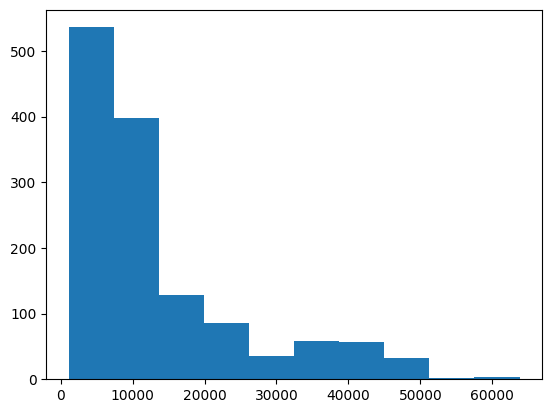

In [ ]:
plt.hist(df['charges'], bins = 10)
plt.show()

The distribution is right skewed (i.e. higher volume in the lower range).

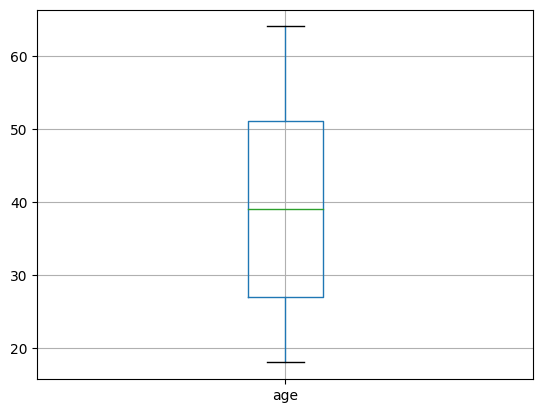

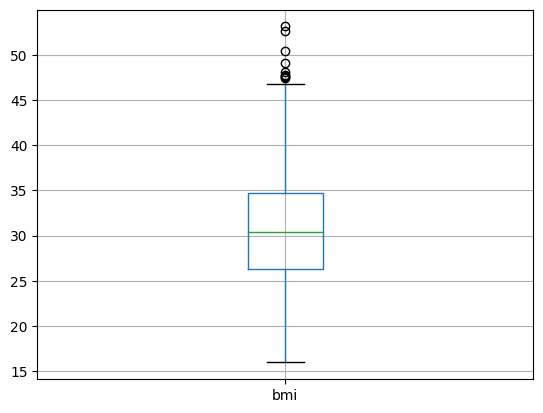

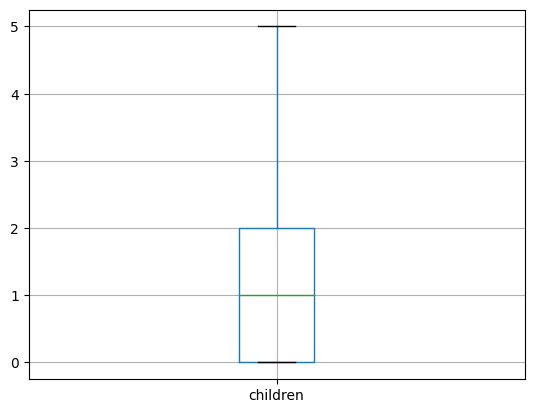

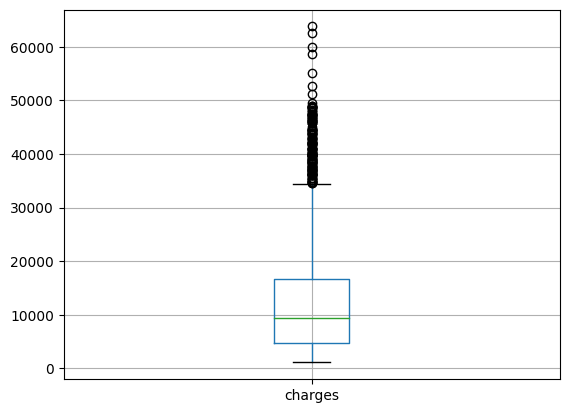

In [ ]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df.boxplot([column])

<ipython-input-47-b96c823b6006>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for column in df.select_dtypes(include=[np.object]).columns:


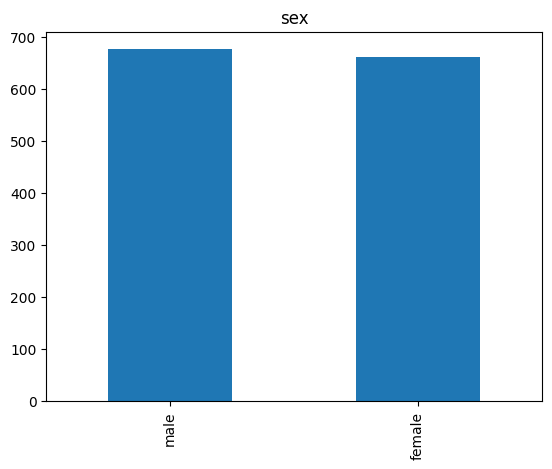

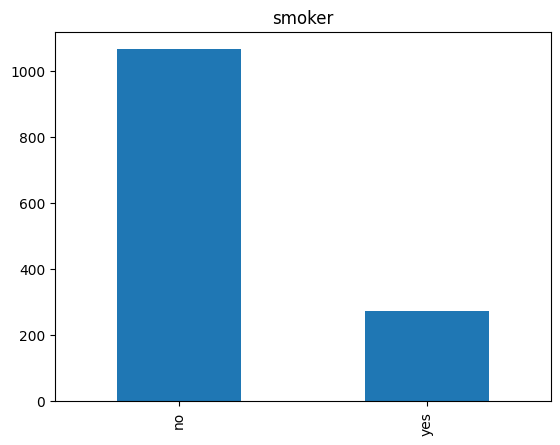

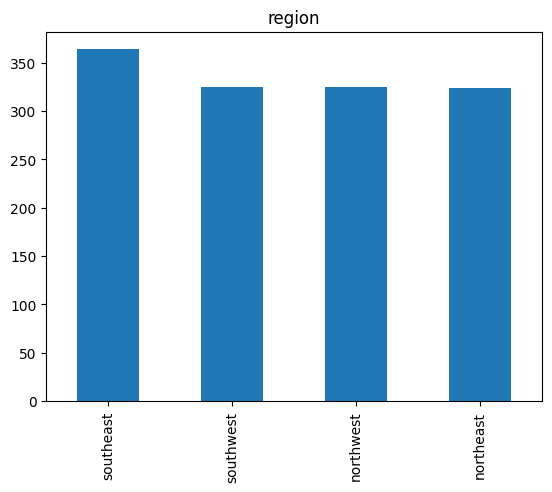

In [ ]:
for column in df.select_dtypes(include=[np.object]).columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

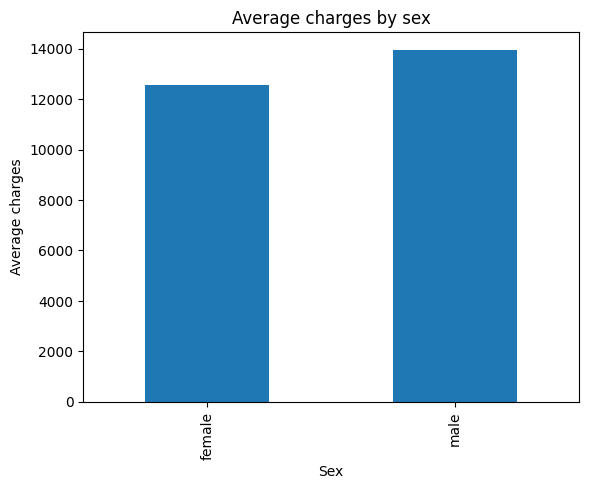

In [ ]:
df = pd.DataFrame(data={'sex': X['sex'], 'region': X['region'], 'age': X['age'],'bmi': X['bmi'],'smoker': X['smoker'],'children': X['children'], 'charges': y})
df.groupby('sex')['charges'].mean().plot(kind='bar')
plt.title('Average charges by sex')
plt.xlabel('Sex')
plt.ylabel('Average charges')
plt.show()

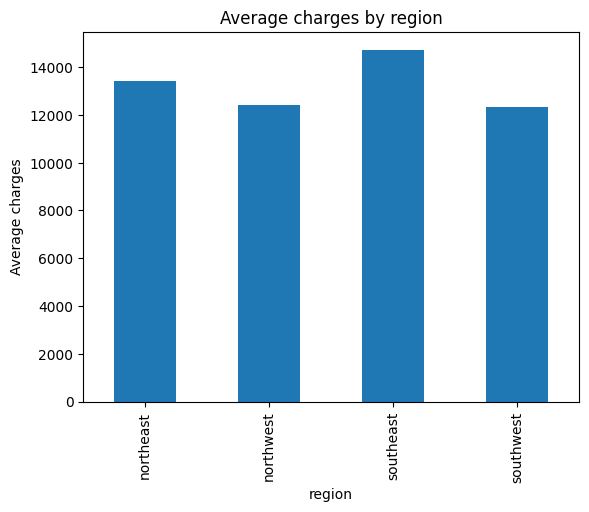

In [ ]:
df.groupby('region')['charges'].mean().plot(kind='bar')
plt.title('Average charges by region')
plt.xlabel('region')
plt.ylabel('Average charges')
plt.show()

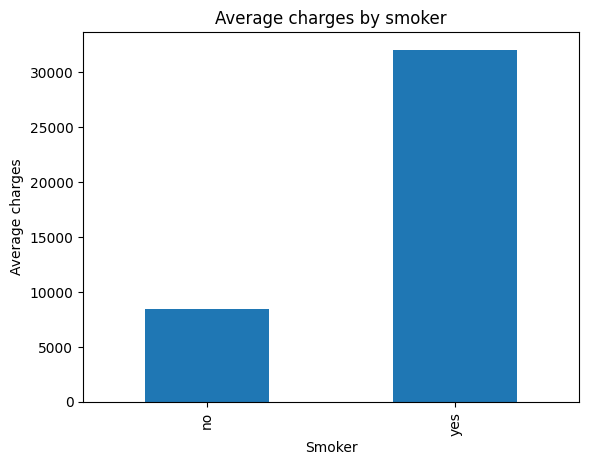

In [ ]:
df.groupby('smoker')['charges'].mean().plot(kind='bar')
plt.title('Average charges by smoker')
plt.xlabel('Smoker')
plt.ylabel('Average charges')
plt.show()

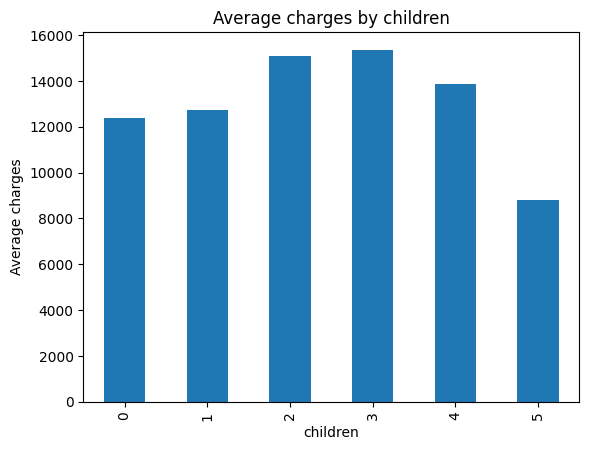

In [ ]:
df.groupby('children')['charges'].mean().plot(kind='bar')
plt.title('Average charges by children')
plt.xlabel('children')
plt.ylabel('Average charges')
plt.show()

# Handling outliers

In [ ]:
df.loc[1,"bmi"]

33.77

In [ ]:
# IQR
# Calculate the upper and lower limits
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [ ]:
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df['bmi']>=upper)[0]
lower_array = np.where(df['bmi']<=lower)[0]

In [ ]:
# Removing the outliers
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

New Shape:  (1329, 7)


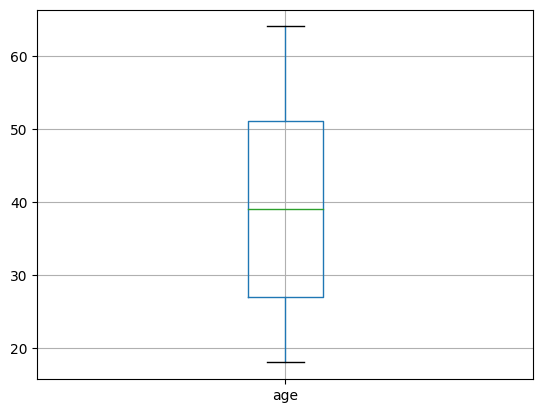

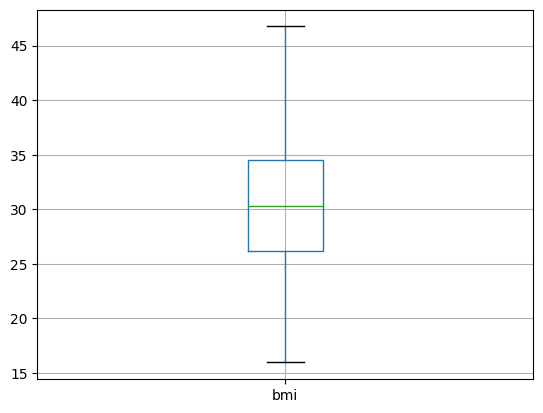

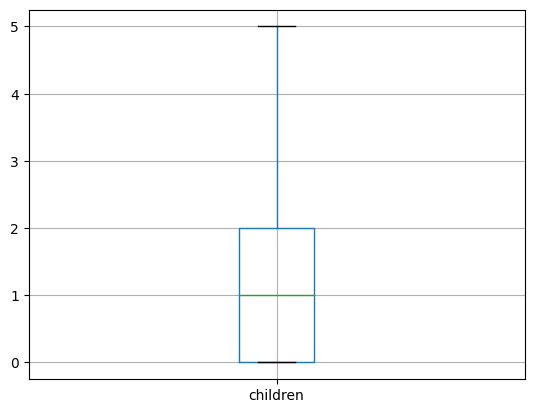

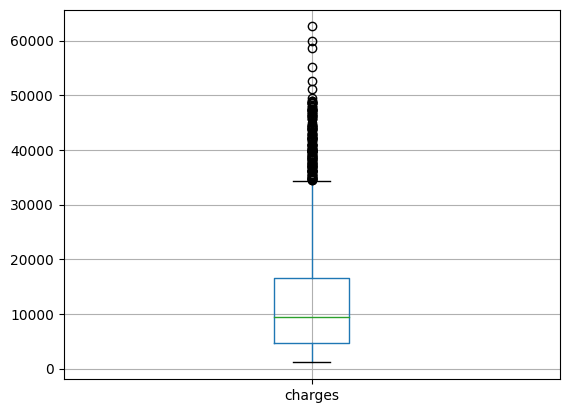

In [ ]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df.boxplot([column])

# hadnling missing values

In [ ]:
df.isna().sum()

sex         0
region      0
age         0
bmi         0
smoker      0
children    0
charges     0
dtype: int64

seems no missing values

In [ ]:
df.head()

,sex,region,age,bmi,smoker,children,charges
0,female,southwest,19,27.900,yes,0,16884.92400
1,male,southeast,18,33.770,no,1,1725.55230
2,male,southeast,28,33.000,no,3,4449.46200
3,male,northwest,33,22.705,no,0,21984.47061
4,male,northwest,32,28.880,no,0,3866.85520


In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['sex', 'smoker', 'region']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

In [ ]:
# split our data into train
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Let's try the Random Forst Regressor
from sklearn.ensemble import RandomForestRegressor
# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train_scaled, y_train)
# Predict the model
predictions = rf.predict(X_test_scaled)
# Evaluate the Random Forest Regressor
rf.score(X_test_scaled, y_test)

0.8398650853217177

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print(r2)

0.8398650853217177


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# Calculate RMSE
rmse = mean_squared_error(y_test, predictions, squared=False)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 2438.055246216418
Mean Squared Error: 20671935.221163653
Root Mean Squared Error: 4546.639992473964


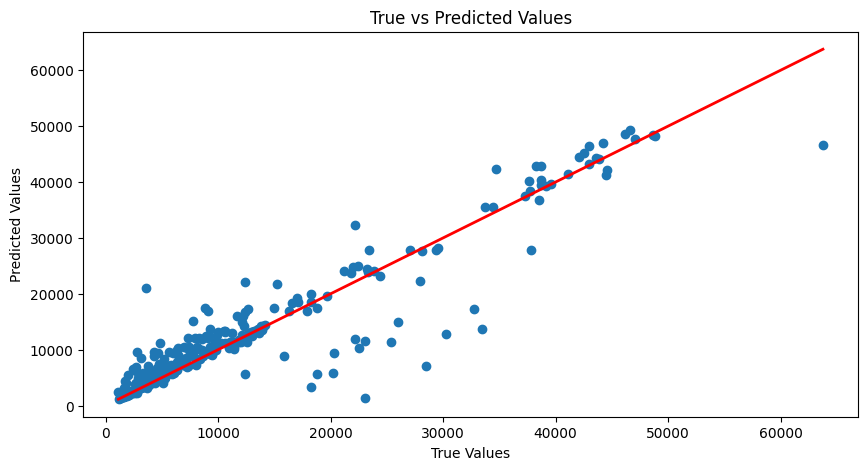

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

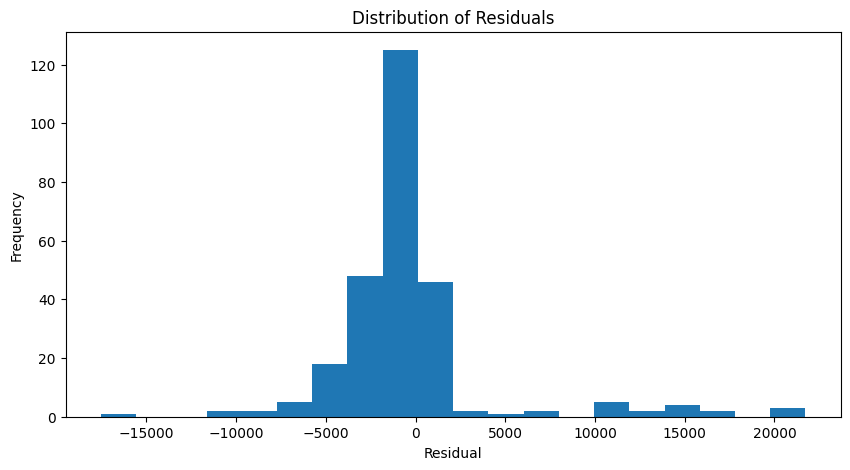

In [ ]:
residuals = y_test - predictions

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

this means our  model is systematically overestimating or underestimating the target variable.

# XGBREGRESSOR MODEL

In [ ]:
#Lets use XGB
from  xgboost import XGBRegressor
Xg_model = XGBRegressor(n_estimators=10, seed = 42)
Xg_model.fit(X_train_scaled, y_train)
# Predict the model
pred = Xg_model.predict(X_test_scaled)
Xg_model.score(X_test_scaled, y_test)

0.875606871725645

In [ ]:
preds = Xg_model.predict(X_train)

In [ ]:
Xg_model.score(X_train, y_train)

-0.7455377733721316

# MODEL EVALUATION

In [ ]:
 # using R2 Score for model evaluation
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print(r2)

0.875606871725645


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, pred)
print('Mean Absolute Error:', mae)

# Calculate MSE
mse = mean_squared_error(y_test, pred)
print('Mean Squared Error:', mse)

# Calculate RMSE
rmse = mean_squared_error(y_test, pred, squared=False)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 2493.0854306617885
Mean Squared Error: 19311875.370887082
Root Mean Squared Error: 4394.527889419645


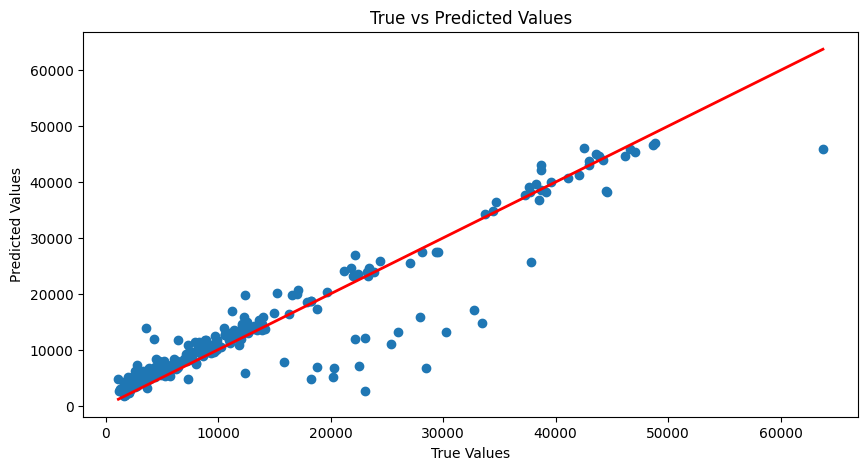

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()

The points are scattered along the the red line, this  means the model’s predictions are accurate.

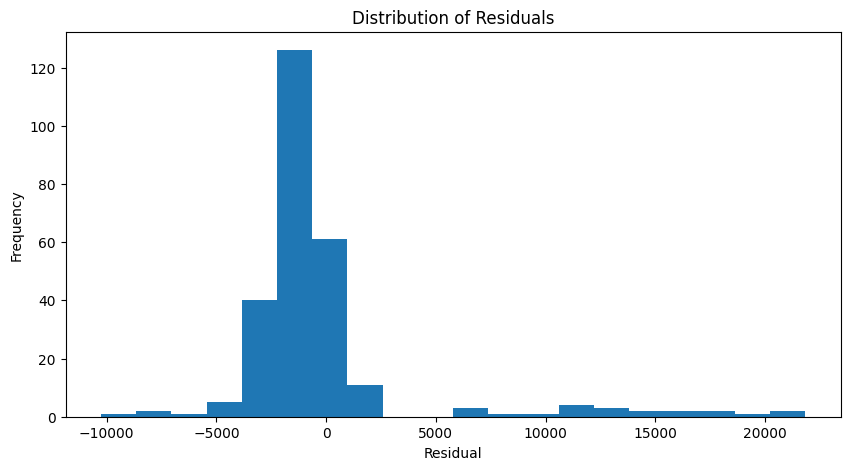

In [ ]:
residuals = y_test - pred

plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()